## Dimensionality Reduction

- __Feature Extraction__ : _An alternative approach to feature selection for_ Dimensionality Reduction.
- In feature selection we maintian the original features, we use feature extraction to transform or__project the data onto a new feature space__.
- In the context of __dimensionality reduction__, feature extraction can be understood as an approach to __data compression with the goal of maintaining most of th relevant information.__

__Note :__ In practice, feature extraction is not only used to improve storage space or computational efficiency of learning algorithm ,  but can also improve the predictive performance by reducing the _curse of dimensionality_ - especially if we are working with _non-regularized_ models.

### Principal Component Analysis - unsupervised linear transformation

- PCA wildely used across fields, most prominently for feature extraction and dimensionality reduction.
- Other applications, in de-noising the signals in stock-market trading, and analysis of genome data and gene expresssions levels.


__PCA__ helps to identify patterns based on <u><font style="color:#0073e6">correlation between features</font></u>.<br>
__PCA aims__ to <font style="color:#0073e6">find the direction of maximum variance</font> in high-dimensional data and __projects it into a new subspace__ with equal ro less fewer dimensions.</font>
> The __orthogonal axes(principal component)__ of new subspace can be interpreted as the directions of maximum variance given the constraint that, new feature are orthogonal to each other.

![pca](pca.png)

- __x1__ and __x2__ are orignial featues, and __PC1__ and __PC2__ are principal components

Summarize the approach of PCA:<br>
1. Standarize the d-dimensional dataset
2. Construct the covariance matrix
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
5. select _k_ eigenvectors which corresponds to the _k_ largest eigenvalues, where _k_ is the dimensionality of the new feature subspace $ k \leq d$
6. Construct a projection matrix __W__ form the "top" _k_ eigenvectors.
7. Transform the _d_-dimensional input dataset __X__ using the projection matrix __W__ to obtain the new _k_-dimensional feature subspace.

As a result of transformation, __first principal component will have the larges possible variance, and all consequent principal component will have the largest variance given the constraint that these components are uncorrelated(orthogonal) to other principal components --even if the input features are correlated, the resulting principal component will be mutually orthogonal (uncorrelated).__

__Note :__ PCA are highly sensitive to data scaling, we need to standarize feature __prior to PCA__.

In [ ]:
import pandas as pd

In [ ]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [ ]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[: ,1:].values , df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [1]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [4]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[: ,1:].values , df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

- The symmetric _dxd_- dimensional covariance matrix, where _d_ is the number of dimensions in the dataset, stores the pairwise covariances betweent he different features.<br>
- The covariance between two features $x_j$ and $x_k$ on the __population level__ can be calculated as:

<br>
<center style='font-size:16px;'> $ \sigma_{jk} \space = \space \frac {1}{n} \sum_{i=1}^{n}\left(x_j^{(i)} - \mu_j\right)\left(x_k^{(i)} - \mu_k\right)$</center>


<br>
where $\mu_{j}$ and $\mu_k$, are the sample means of feature _j_ and _k_<br>
__Note:__ that the sample means are zero if we standarized the dataset.

In [ ]:
import numpy as np
cov_mat = np.cov(X_train_std.T)

In [10]:
cov_mat

array([[ 1.00813008,  0.06709556,  0.17405351, -0.35439069,  0.26374703,
         0.29079481,  0.21835807, -0.08111974,  0.10436705,  0.54282846,
         0.05893536, -0.01797029,  0.6415292 ],
       [ 0.06709556,  1.00813008,  0.08326463,  0.26356776, -0.11349172,
        -0.33735555, -0.41035281,  0.33653916, -0.21602672,  0.17504154,
        -0.551593  , -0.40561695, -0.24089991],
       [ 0.17405351,  0.08326463,  1.00813008,  0.46420355,  0.29092834,
         0.18020384,  0.15537535,  0.15918823, -0.00703776,  0.20549146,
         0.00665422,  0.02039019,  0.223495  ],
       [-0.35439069,  0.26356776,  0.46420355,  1.00813008, -0.07406447,
        -0.28060672, -0.31391899,  0.31581353, -0.24621059, -0.08872685,
        -0.22595587, -0.16799906, -0.46393412],
       [ 0.26374703, -0.11349172,  0.29092834, -0.07406447,  1.00813008,
         0.25667578,  0.21025773, -0.26003426,  0.19601657,  0.20606456,
         0.13359768,  0.06633258,  0.41810999],
       [ 0.29079481, -0.337355

- The eigenvectors of the covariance matrix represent the principal component(__the direction of maximum variance__), whereas the corresponding eigenvalues will define their magnitude<br>
<br>
an eigenvector __v__ satisfies the following condition: <br>

<center> $ \sum  v = \lambda v$</center><br>
where;<br>
$\sum$: is the covariance matrix<br>
v: is the eigenvector<br>
$\lambda$: is the eigenvalue

In [62]:
eigen_value, eigen_vecs = np.linalg.eig(cov_mat)

In [7]:
#  Printing the eigen values
eigen_value

array([ 4.84274532,  2.41602459,  1.54845825,  0.96120438,  0.84166161,
        0.6620634 ,  0.51828472,  0.34650377,  0.3131368 ,  0.10754642,
        0.21357215,  0.15362835,  0.1808613 ])

In [9]:
# Printe the eigen vectors
eigen_vecs

array([[ -1.37242175e-01,   5.03034778e-01,  -1.37748734e-01,
         -3.29610003e-03,  -2.90625226e-01,   2.99096847e-01,
          7.90529293e-02,  -3.68176414e-01,  -3.98377017e-01,
         -9.44869777e-02,   3.74638877e-01,  -1.27834515e-01,
          2.62834263e-01],
       [  2.47243265e-01,   1.64871190e-01,   9.61503863e-02,
          5.62646692e-01,   8.95378697e-02,   6.27036396e-01,
         -2.74002014e-01,  -1.25775752e-02,   1.10458230e-01,
          2.63652406e-02,  -1.37405597e-01,   8.06401578e-02,
         -2.66769211e-01],
       [ -2.54515927e-02,   2.44564761e-01,   6.77775667e-01,
         -1.08977111e-01,  -1.60834991e-01,   3.89128239e-04,
          1.32328045e-01,   1.77578177e-01,   3.82496856e-01,
          1.42747511e-01,   4.61583035e-01,   1.67924873e-02,
         -1.15542548e-01],
       [  2.06945084e-01,  -1.13529045e-01,   6.25040550e-01,
          3.38187002e-02,   5.15873402e-02,  -4.05836452e-02,
          2.23999097e-01,  -4.40592110e-01,  -2.433

_Variance explained ratio_: The variance explained ratio of an eigenvalue $\lambda_j$ is simply the fraction of an eigenvalue $\lambda_j$ and the total sum of the eigenvalues:<br><br>

<center style='font-size:16px;'>$ \frac {\lambda_j}{\sum_{j=1}^{d} \space \lambda _j}$</center>

In [13]:
tot = sum(eigen_value)
var_expld = [ i/tot for i in sorted(eigen_value, reverse=True)]
cum_var_expld = np.cumsum(var_expld)

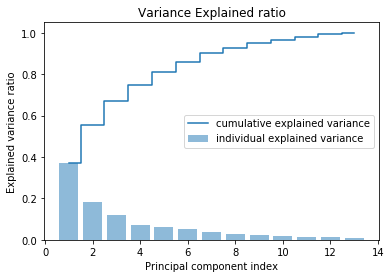

In [64]:
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_expld, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,14), cum_var_expld, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Variance Explained ratio')
plt.legend(loc='best')
plt.show()

- We can see that the first 2 Princicpal component combined explain almost 60 percent of the variance in the dataset

#### Feature Transformation

In [30]:
#  Making a list of (eigenvalue, eigenvector) tuples
eigen_pairs  = [(np.abs(eigen_value[i]), eigen_vecs[:,i]) for i in range(len(eigen_value))]

# Sort the (eigenvalue, eigenvector) tuple from high to low
eigen_pairs.sort(key = lambda x: x[0], reverse=True)

We collect the two eigenvectors that correspond to the two largest eigenvalues<br>
Note that we only choose two eigenvectors for the purpose of illlustration, since we will plot the data

In [65]:
# Creating a w matrix
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W: \n', w)

Matrix W: 
 [[-0.13724218  0.24724326]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.09615039]
 [ 0.20694508  0.56264669]
 [-0.15436582  0.08953787]
 [-0.39376952  0.6270364 ]
 [-0.41735106  0.27400201]
 [ 0.30572896  0.01257758]
 [-0.30668347  0.11045823]
 [ 0.07554066  0.02636524]
 [-0.32613263  0.1374056 ]
 [-0.36861022  0.08064016]
 [-0.29669651  0.26676921]]


In [38]:
# np.matmul(X_train_std, w).shape
X_train_pca = X_train_std.dot(w)

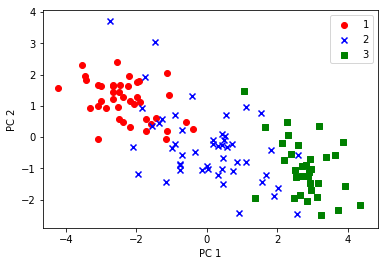

In [40]:
colors = ['r','b','g']
markers = ['o','x','s']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
               c=c, label=l, marker =m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()

- We can see in the plot, the data is more spread along the x-axis -the first principal component - than the second principal component (y-axis), which is consistent with the explained variance ratio plot.

### Principal Component Analysis in scikit-learn

In [50]:
import sys
sys.path.append('/home/amit/Documents/ML/python_ML_RASCHKA/chap2/')

from utilities import plot_decision_regions

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [59]:
lr.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

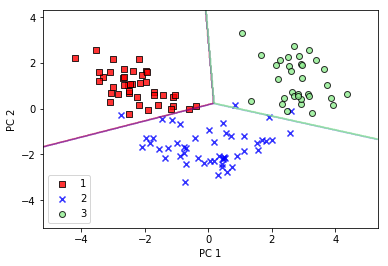

In [60]:
plot_decision_regions(X_train_pca,y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

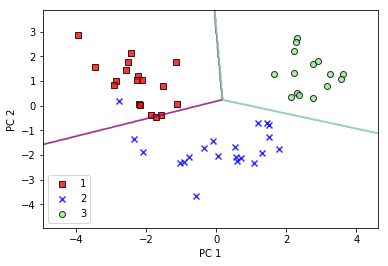

In [61]:
plot_decision_regions(X_test_pca,y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

- If we are interested in the explained variance ratios of the different principal components, we can simply intialize the PCA with the _n_components_ paramert set to _None_, so all principal components are kept.

In [66]:
pca = PCA(n_components=None)
X_train_pca = pca.fit(X_train_std)
pca.explained_variance_ratio_

array([ 0.36951469,  0.18434927,  0.11815159,  0.07334252,  0.06422108,
        0.05051724,  0.03954654,  0.02643918,  0.02389319,  0.01629614,
        0.01380021,  0.01172226,  0.00820609])